In [1]:
!pip install feature_engine

In [2]:
!pip install dtale

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import dtale
import matplotlib.pyplot as plt
from feature_engine.outliers import Winsorizer
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler 
from sklearn.pipeline import Pipeline
import joblib,pickle
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix,accuracy_score 
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import GridSearchCV

In [4]:
df=pd.read_csv(r'C:\Users\admin\Documents\Datasets_Multinomial\mdata.csv')
df

,Unnamed: 0,id,female,ses,schtyp,prog,read,write,math,science,honors
0,1,45,female,low,public,vocation,34,35,41,29,not enrolled
1,2,108,male,middle,public,general,34,33,41,36,not enrolled
2,3,15,male,high,public,vocation,39,39,44,26,not enrolled
3,4,67,male,low,public,vocation,37,37,42,33,not enrolled
4,5,153,male,middle,public,vocation,39,31,40,39,not enrolled
...,...,...,...,...,...,...,...,...,...,...,...
195,196,100,female,high,public,academic,63,65,71,69,enrolled
196,197,143,male,middle,public,vocation,63,63,75,72,enrolled
197,198,68,male,middle,public,academic,73,67,71,63,enrolled
198,199,57,female,middle,public,academic,71,65,72,66,enrolled


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  200 non-null    int64 
 1   id          200 non-null    int64 
 2   female      200 non-null    object
 3   ses         200 non-null    object
 4   schtyp      200 non-null    object
 5   prog        200 non-null    object
 6   read        200 non-null    int64 
 7   write       200 non-null    int64 
 8   math        200 non-null    int64 
 9   science     200 non-null    int64 
 10  honors      200 non-null    object
dtypes: int64(6), object(5)
memory usage: 17.3+ KB


In [6]:
df.describe()

,Unnamed: 0,id,read,write,math,science
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,100.500000,52.230000,52.775000,52.645000,51.850000
std,57.879185,57.879185,10.252937,9.478586,9.368448,9.900891
min,1.000000,1.000000,28.000000,31.000000,33.000000,26.000000
25%,50.750000,50.750000,44.000000,45.750000,45.000000,44.000000
50%,100.500000,100.500000,50.000000,54.000000,52.000000,53.000000
75%,150.250000,150.250000,60.000000,60.000000,59.000000,58.000000
max,200.000000,200.000000,76.000000,67.000000,75.000000,74.000000


In [7]:
duplicate=df.duplicated()
print(duplicate)
sum(duplicate)

0      False
1      False
2      False
3      False
4      False
       ...  
195    False
196    False
197    False
198    False
199    False
Length: 200, dtype: bool


0

In [8]:
df.isna().sum()

Unnamed: 0    0
id            0
female        0
ses           0
schtyp        0
prog          0
read          0
write         0
math          0
science       0
honors        0
dtype: int64

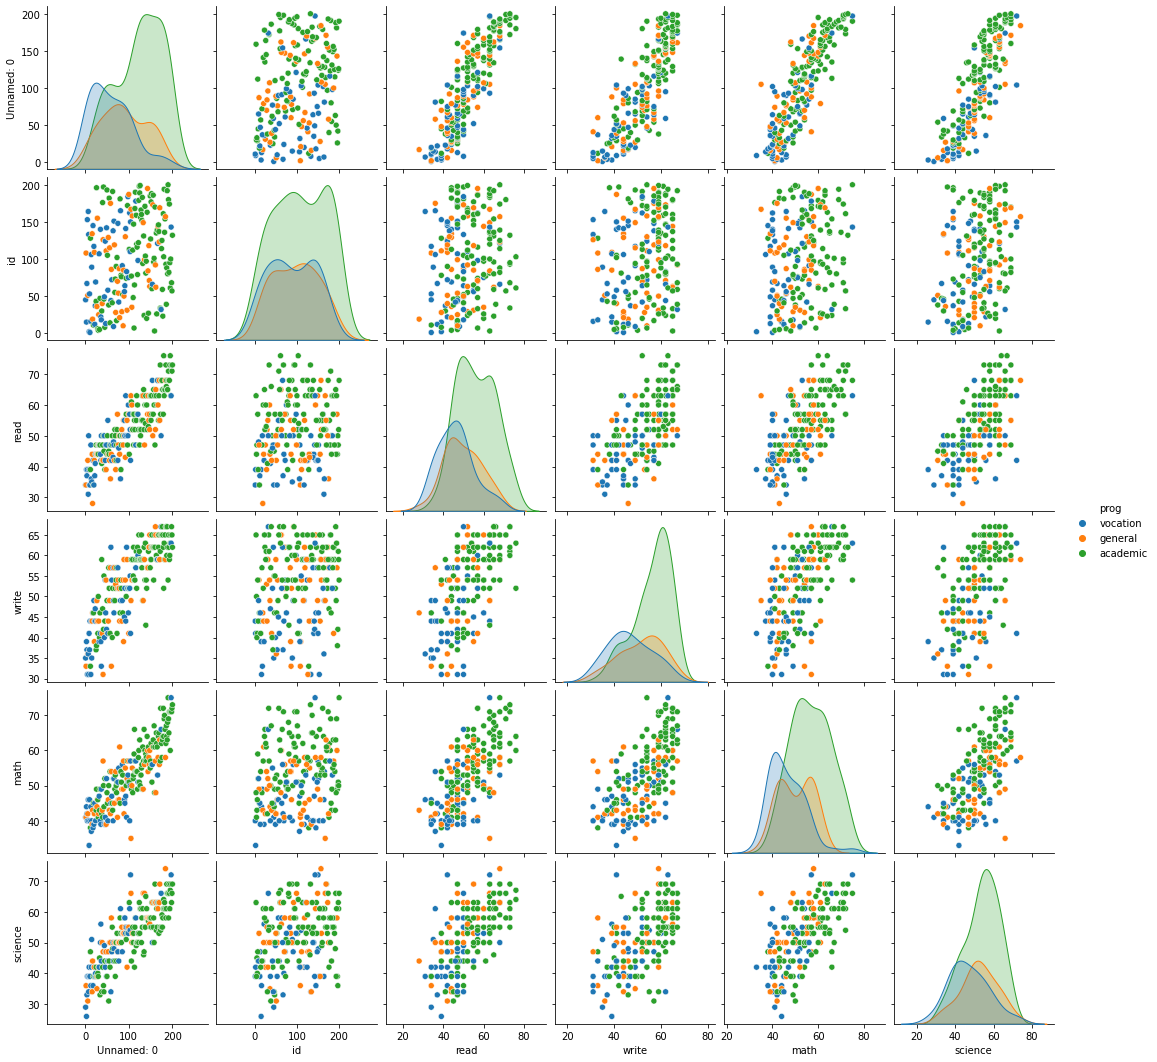

In [9]:
sns.pairplot(df,hue='prog')

In [10]:
X=df[['ses','honors']]
X

,ses,honors
0,low,not enrolled
1,middle,not enrolled
2,high,not enrolled
3,low,not enrolled
4,middle,not enrolled
...,...,...
195,high,enrolled
196,middle,enrolled
197,middle,enrolled
198,middle,enrolled


In [11]:
Y=df[['prog']]
Y

,prog
0,vocation
1,general
2,vocation
3,vocation
4,vocation
...,...
195,academic
196,vocation
197,academic
198,academic


In [12]:
X1=df.iloc[:,6:10]
X1

,read,write,math,science
0,34,35,41,29
1,34,33,41,36
2,39,39,44,26
3,37,37,42,33
4,39,31,40,39
...,...,...,...,...
195,63,65,71,69
196,63,63,75,72
197,73,67,71,63
198,71,65,72,66


In [13]:
numerical=X1.select_dtypes(exclude=['object']).columns
numerical

Index(['read', 'write', 'math', 'science'], dtype='object')

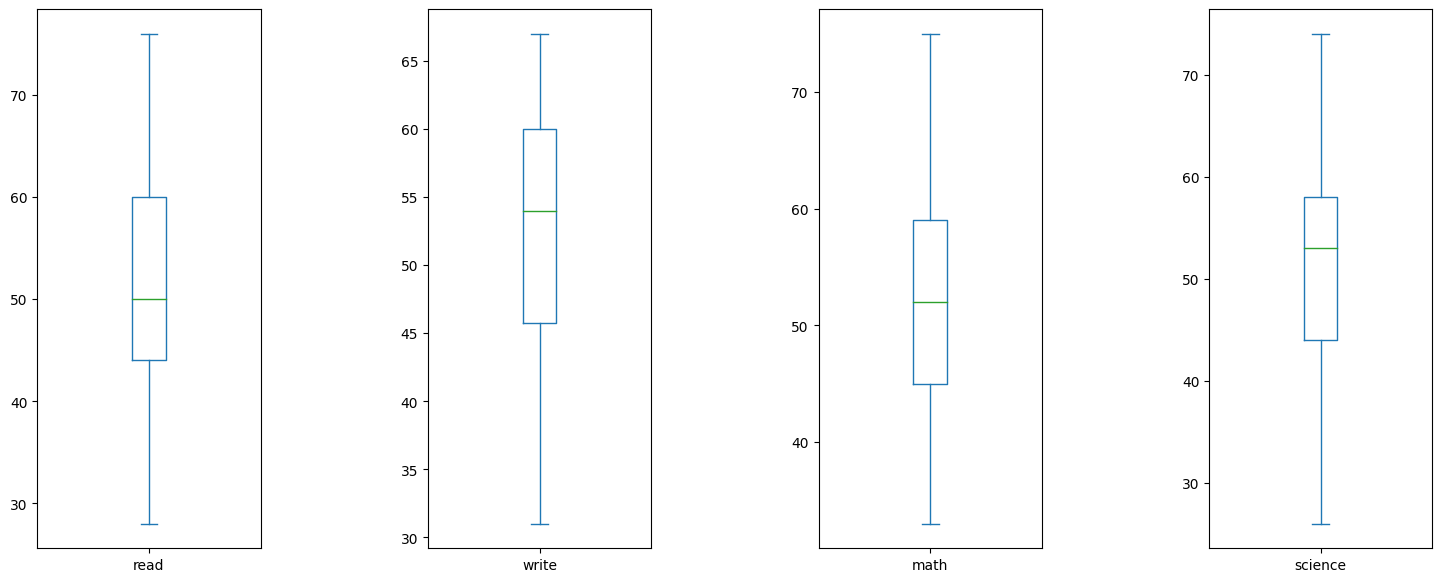

In [14]:
X1.plot(kind='box',subplots=True,sharey=False,figsize=(18,7))
plt.subplots_adjust(wspace=0.75)
plt.show()

In [15]:
winsor=Winsorizer(capping_method='iqr',
                 tail='both',
                 fold=1.5,
                 variables=['read','math'])

In [16]:
outlier_pipeline=Pipeline(steps=[('winsor',winsor)])
outlier_pipeline

Pipeline(steps=[('winsor',
                 Winsorizer(capping_method='iqr', fold=1.5, tail='both',
                            variables=['read', 'math']))])

In [17]:
preprocessor1=ColumnTransformer(transformers=[('wins',outlier_pipeline,numerical)])
                            
print(preprocessor1)

ColumnTransformer(transformers=[('wins',
                                 Pipeline(steps=[('winsor',
                                                  Winsorizer(capping_method='iqr',
                                                             fold=1.5,
                                                             tail='both',
                                                             variables=['read',
                                                                        'math']))]),
                                 Index(['read', 'write', 'math', 'science'], dtype='object'))])


In [18]:
winz_data=preprocessor1.fit(X1)

In [19]:
joblib.dump(winz_data,'winzor')

['winzor']

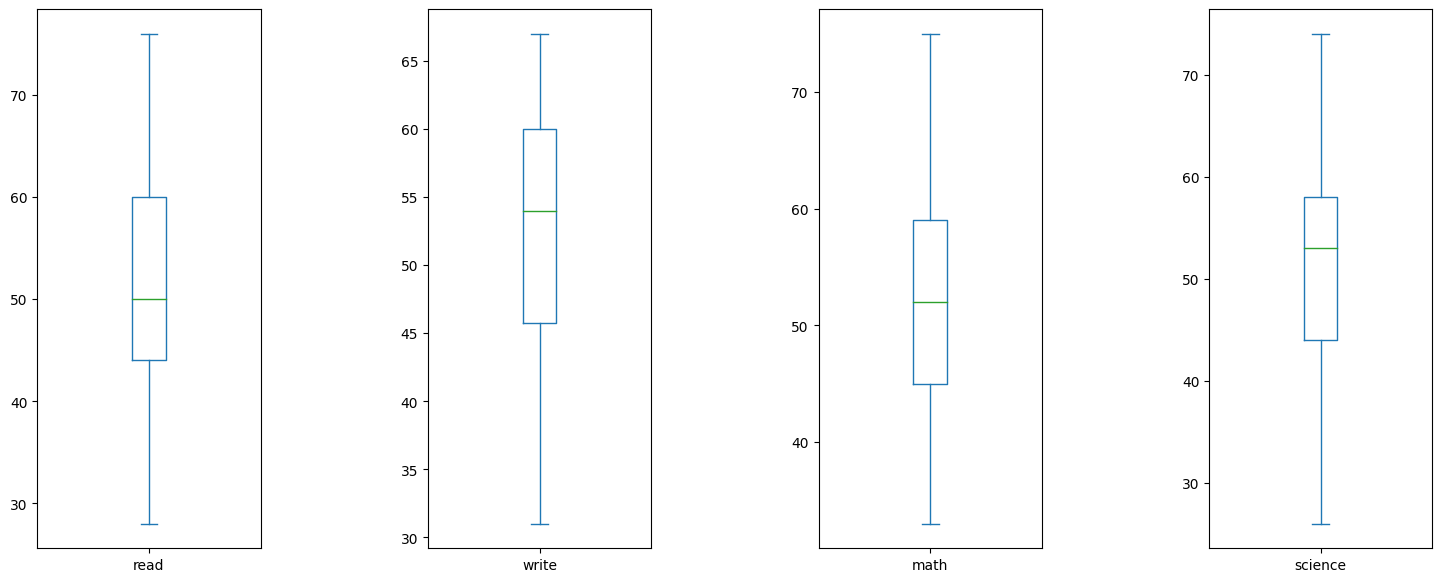

In [20]:
X1.plot(kind='box',subplots=True,sharey=False,figsize=(18,7))
plt.subplots_adjust(wspace=0.75)
plt.show()

In [21]:
scale_pipeline=Pipeline(steps=[('scale',MinMaxScaler())])
preprocessor2=ColumnTransformer(transformers=[('num',scale_pipeline,numerical)])
print(preprocessor2)
scale=preprocessor2.fit(X1)
joblib.dump(scale,'scale')
X2=pd.DataFrame(scale.transform(X1),columns=X1.columns)
X2.columns
X2.info()

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scale', MinMaxScaler())]),
                                 Index(['read', 'write', 'math', 'science'], dtype='object'))])
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   read     200 non-null    float64
 1   write    200 non-null    float64
 2   math     200 non-null    float64
 3   science  200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [22]:
X2

,read,write,math,science
0,0.125000,0.111111,0.190476,0.062500
1,0.125000,0.055556,0.190476,0.208333
2,0.229167,0.222222,0.261905,0.000000
3,0.187500,0.166667,0.214286,0.145833
4,0.229167,0.000000,0.166667,0.270833
...,...,...,...,...
195,0.729167,0.944444,0.904762,0.895833
196,0.729167,0.888889,1.000000,0.958333
197,0.937500,1.000000,0.904762,0.770833
198,0.895833,0.944444,0.928571,0.833333


In [23]:
X2.describe()

,read,write,math,science
count,200.000000,200.000000,200.000000,200.000000
mean,0.504792,0.604861,0.467738,0.538542
std,0.213603,0.263294,0.223058,0.206269
min,0.000000,0.000000,0.000000,0.000000
25%,0.333333,0.409722,0.285714,0.375000
50%,0.458333,0.638889,0.452381,0.562500
75%,0.666667,0.805556,0.619048,0.666667
max,1.000000,1.000000,1.000000,1.000000


In [24]:
X3=df.iloc[:,[3,10]]
X3

,ses,honors
0,low,not enrolled
1,middle,not enrolled
2,high,not enrolled
3,low,not enrolled
4,middle,not enrolled
...,...,...
195,high,enrolled
196,middle,enrolled
197,middle,enrolled
198,middle,enrolled


In [25]:
le=LabelEncoder()
X3['ses']=le.fit_transform(X3['ses'])
X3['honors']=le.fit_transform(X3['honors'])
Y['prog']=le.fit_transform(Y['prog'])
X2.info()
Y.info


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   read     200 non-null    float64
 1   write    200 non-null    float64
 2   math     200 non-null    float64
 3   science  200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


C:\Users\admin\AppData\Local\Temp\ipykernel_5792\3947513483.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\admin\AppData\Local\Temp\ipykernel_5792\3947513483.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\admin\AppData\Local\Temp\ipykernel_5792\3947513483.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

<bound method DataFrame.info of      prog
0       2
1       1
2       2
3       2
4       2
..    ...
195     0
196     2
197     0
198     0
199     0

[200 rows x 1 columns]>

In [26]:
X4=pd.concat([X2,X3],axis=1)
X4

,read,write,math,science,ses,honors
0,0.125000,0.111111,0.190476,0.062500,1,1
1,0.125000,0.055556,0.190476,0.208333,2,1
2,0.229167,0.222222,0.261905,0.000000,0,1
3,0.187500,0.166667,0.214286,0.145833,1,1
4,0.229167,0.000000,0.166667,0.270833,2,1
...,...,...,...,...,...,...
195,0.729167,0.944444,0.904762,0.895833,0,0
196,0.729167,0.888889,1.000000,0.958333,2,0
197,0.937500,1.000000,0.904762,0.770833,2,0
198,0.895833,0.944444,0.928571,0.833333,2,0


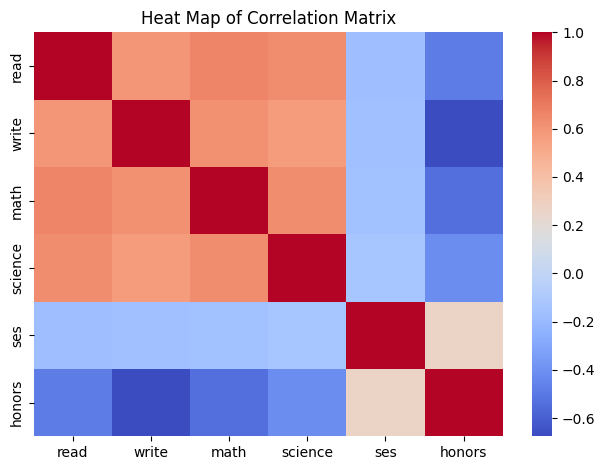

In [45]:
corrmatrix = X4.corr(method = "pearson")

sns.heatmap(corrmatrix, xticklabels = corrmatrix.columns, yticklabels = corrmatrix.columns, cmap = "coolwarm")
plt.title('Heat Map of Correlation Matrix')
plt.tight_layout()
plt.show()

In [27]:
X_train,X_test,Y_train,Y_test=train_test_split(X4,Y,test_size=0.2,random_state=0,stratify=Y )

In [28]:
logmodel=LogisticRegression(multi_class='multinomial',solver='newton-cg')
model=logmodel.fit(X_train,Y_train)

C:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [29]:
train_predict=model.predict(X_train)
accuracy_score(Y_train,train_predict)

0.6

In [30]:
test_predict=model.predict(X_test)
accuracy_score(Y_test,test_predict)

0.6

C:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



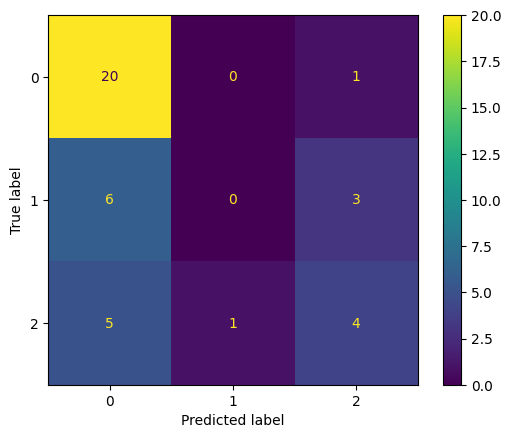

In [31]:
conf_mat=plot_confusion_matrix(model,X_test,Y_test)
print(conf_mat)

In [32]:
logmodel1=LogisticRegression(multi_class='multinomial') 

In [33]:
param_grid=[
    {'penalty':['l1','l2','elasticnet','none'],
     'C':np.logspace(-4,4,20),
    'solver':['lfbg','newton-cg','liblinear','sag','saga'],
    'max_iter':[100,1000,2500,5000]}
]


In [34]:
clf=GridSearchCV(logmodel1,param_grid=param_grid,cv=3,verbose=True,n_jobs=-1 ) 
best_clf=clf.fit(X_train,Y_train)

Fitting 3 folds for each of 1600 candidates, totalling 4800 fits


C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning:


3120 fits failed out of a total of 4800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
960 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 434, in _check_solver
    raise ValueError

In [35]:
best_clf.best_estimator_

LogisticRegression(C=4.281332398719396, multi_class='multinomial',
                   solver='newton-cg')

In [36]:
print(f'Accuracy-: {best_clf.score(X_train,Y_train):.3f}')

Accuracy-: 0.613


In [37]:
print(f'Accuracy-: {best_clf.score(X_test,Y_test):.3f}')

Accuracy-: 0.625


C:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



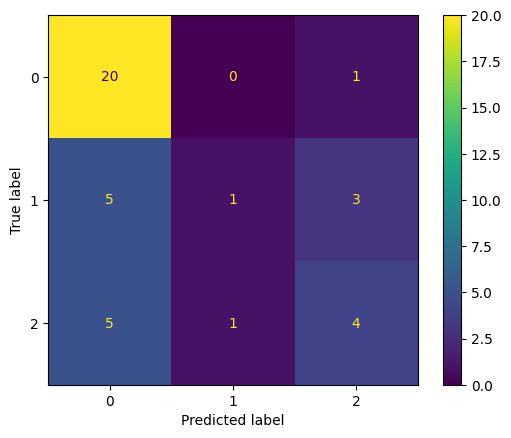

In [38]:
conf_mat=plot_confusion_matrix(best_clf,X_test,Y_test)
print(conf_mat)

In [39]:
best_clf1=clf.fit(X4,Y)

Fitting 3 folds for each of 1600 candidates, totalling 4800 fits


C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning:


3120 fits failed out of a total of 4800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
960 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 434, in _check_solver
    raise ValueError

In [40]:
best_clf1.best_estimator_

LogisticRegression(C=0.03359818286283781, multi_class='multinomial',
                   solver='newton-cg')

In [41]:
print(f'Accuracy-: {best_clf1.score(X4,Y):.3f}')

Accuracy-: 0.550


In [42]:
print(f'Accuracy-: {best_clf1.score(X_test,Y_test):.3f}')

Accuracy-: 0.550


In [ ]:
auc=metrics.roc_auc_score(Y_train,Y_test)
print('AUC=',f'{auc:0.4f}')

In [49]:
pickle.dump(best_clf,open('multinomial.pkl','wb'))

In [50]:
model=pickle.load(open('multinomial.pkl','rb'))
winzor=joblib.load('winzor')
scale=joblib.load('scale')

In [51]:
data=pd.read_csv(r'C:\Users\admin\Documents\Datasets_Multinomial\mdata.csv')
clean=pd.DataFrame(winzor.transform(data),columns=data.columns)
clean1=pd.DataFrame(scale.transform(clean),columns=data.columns)
predictions=pd.DataFrame(model.predict(clean1),columns=['prog'])
predictions

ValueError: Shape of passed values is (200, 4), indices imply (200, 11)